# N-Layer Neural Network | Text Colour Predictor

Task:
- Feed-forward neural network.
- Feed RGB values of 'background colour'.
- Predict if dark or light coloured text should be used over the RGB colour to make the text readable.

Resources:
- [Feed-forward NN playground](https://playground.tensorflow.org)
- [Activation functions](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/)

## Import libraries:

In [1]:
# Import libraries:
import numpy as np # For linear algebra.
import pandas as pd # For data processing, CSV file I/O (e.g. pd.read_csv).
import matplotlib.pyplot as plt # For data visualisation.
from PIL import Image, ImageDraw, ImageFont, ImageEnhance # For data visualisation.
%matplotlib inline

## RGB class and tool functions:

In [2]:
class Error(Exception):
    """Base class for exceptions in this module."""
    pass

class InputError(Error):
    '''Exception raised for errors in the input.

    Attributes:
        expr -- Input expression in which the error occurred.
        msg  -- Explanation of the error.'''
    def __init__(self, expr, msg):
        self.expr = expr
        self.msg = msg

class RGB():
    '''Defined with values for RGB as input.
    
    Attributes:
        RGB -- Input RGB values should range from 0 to 255.
        hex -- Automatically converts RGB to hex values.'''
    def __init__(self, R, G, B):
        for X in [R, G, B]:
            if (X < 0) or (X > 255):
                raise InputError(X, 'Not an RGB value.')
        self.R = R
        self.G = G
        self.B = B
        self.RGB = (R, G, B)
        self.hex = '#{:02X}{:02X}{:02X}'.format(self.R,self.G,self.B)

def generate_RGB_data(X, extreme=False, extreme_magnitude=200):
    '''Generates a list filled with X number of RGB class values.
    Optional: generate cols that are v. dark + v. light for training.
    
    Attributes:
        X -- Number of desired RGB instances.
        extreme -- Boolean to generate v. dark + v. light cols.
        extreme_magnitude -- Int between 1 and 254.'''
    if extreme == True:
        cols = []
        for x in range(X):
            minimum = extreme_magnitude*(x%2)
            maximum = 255-(extreme_magnitude*(not x%2))
            rgb = RGB(np.random.randint(low=minimum, high=maximum),
                      np.random.randint(low=minimum, high=maximum),
                      np.random.randint(low=minimum, high=maximum))
            cols.append(rgb)
        return cols
                        
    else:
        return [RGB(np.random.randint(0, 255),
                    np.random.randint(0, 255),
                    np.random.randint(0, 255))
                for i in range(X)]

def display_RGB_colour(colour, font_col='#000'):
    '''Will draw a box of given colour;
    and fill with text of given font colour.
    
    Attributes:
        colour -- String containing a RGB or hex value.
        font_col -- String containing a RGB or hex value.'''
    img = Image.new(mode='RGB', size=(100, 100), color=colour)
    img_draw = ImageDraw.Draw(img)
    img_draw.text((36, 45), 'Text', fill=font_col)
    plt.imshow(img)
    plt.show();

## Data visualisation:

RGB: (1, 10, 44) Hex: #010A2C


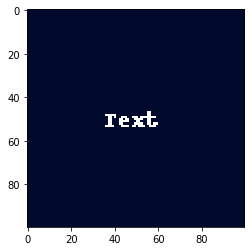

In [3]:
# Test the RGB class and data visualisation tool functions:
colours = generate_RGB_data(X=1, extreme=True, extreme_magnitude=200)

for colour in colours:
    print('RGB:', colour.RGB, 'Hex:', colour.hex)
    display_RGB_colour(colour=colour.RGB, font_col='#fff')

## Generate data:

In [4]:
np.random.seed(42) # Optional: set seed for data generation.

data = pd.DataFrame([x.RGB for x in generate_RGB_data(X=500,
                                                      extreme=True,
                                                      extreme_magnitude=200)],
                     columns=['R', 'G', 'B'])

display('Training set:', data)

'Training set:'

,R,G,B
0,38,51,28
1,214,242,207
2,20,38,18
3,222,210,210
4,23,52,35
...,...,...,...
495,227,231,249
496,6,28,7
497,200,254,202
498,23,22,7


## Assign Labels (NB: lazy method)

In [5]:
# Import libraries:
from sklearn.cluster import AgglomerativeClustering

In [6]:
clusterer = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data.values)
y = clusterer.labels_

---> light text


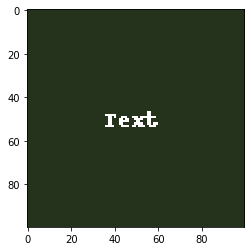

---> dark text


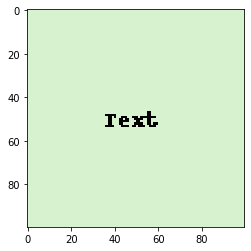

In [7]:
for i, label in enumerate(y[:2]):
    
    if label == 0: # NB: must check for most appriate label-to-class assignment.
        print('---> light text')
        display_RGB_colour(colour=tuple(data.iloc[i, :]), font_col='#fff')
        
    else:
        print('---> dark text')
        display_RGB_colour(colour=tuple(data.iloc[i, :]), font_col='#000')

## Train/test split:

In [8]:
# Import libraries:
from sklearn.model_selection import train_test_split

In [9]:
# Split data into training & testing sets:
train_temp, test_temp = train_test_split(data.join(pd.Series(y, name='y')))

display(train_temp.head())
display(test_temp.head())

,R,G,B,y
391,235,212,242,1
256,38,0,2,0
44,11,33,32,0
213,220,235,209,1
113,247,224,234,1


,R,G,B,y
42,38,40,27,0
467,226,233,226,1
227,208,206,227,1
155,250,222,214,1
7,223,243,229,1


## Preprocessing:

In [10]:
# Import libraries:
from sklearn.preprocessing import normalize

train = pd.DataFrame(np.insert(normalize(X=train_temp.values[:, :3]), 3, train_temp.values[:, 3], axis=1),
                     index=train_temp.index,
                     columns=train_temp.columns)

test = pd.DataFrame(np.insert(normalize(X=test_temp.values[:, :3]), 3, test_temp.values[:, 3], axis=1),
                    index=test_temp.index,
                    columns=test_temp.columns)

display(train.head())
display(test.head())

,R,G,B,y
391,0.589840,0.532111,0.607410,1.0
256,0.998618,0.000000,0.052559,0.0
44,0.232729,0.698188,0.677031,0.0
213,0.573208,0.612291,0.544548,1.0
113,0.606345,0.549884,0.574433,1.0


,R,G,B,y
42,0.618643,0.651203,0.439562,0.0
467,0.571391,0.589089,0.571391,1.0
227,0.561488,0.556089,0.612778,1.0
155,0.629781,0.559245,0.539092,1.0
7,0.555388,0.605199,0.570332,1.0


## Building the NN:

In [11]:
# Define Neuron class:
class NeuralNetwork():
    def __init__(self, X, y, bias=1, eta=0.1, n_nodes=2, n_layers=2, Ws=None, linear=False):
        '''Initialise internal state of network. CAUTION: when setting own Ws param,
        make sure the matrix dimensions are correct.
        
        Attributes:
        X -- Initial input vector; should be a numpy array or matrix.
        y -- Initial y_true; should be numpy array.
        Ws -- Optional. If given should be a list of numpy arrays.'''
        # Create list of LAYERS:
        self.layers = []
        self.layers.append(X) # Append input layer.
        for i in range(n_layers-1):
            self.layers.append(np.zeros((n_nodes, 1))) # Append hidden layers.
        self.layers.append(np.zeros(y.shape)) # Append output layer.

        # Create list of WEIGHTS:
        if Ws is None:
            self.Ws = []
            for i in range(n_layers):
                self.Ws.append(np.random.rand(self.layers[i+1].shape[0], self.layers[i].shape[0]))
        else:
            self.Ws = Ws

        # Create list of BIASES:
        self.biases = []
        for i in range(n_layers):
            self.biases.append(np.ones((self.Ws[i].shape[0], self.layers[i].shape[1]))*bias) # Multiply bias.

        # Set the other parameters:
        self.y_true = y
        self.eta = eta
        self.linear = linear
        self.n_layers = n_layers
    
    def activ_func(self, x):
        '''Activation function used during forward pass.'''
        # For linear:
        if self.linear is True:
            return x
        # For sigmoid:
        else:
            return 1.0/(1.0 + np.exp(-x))
    
    def forwardpass(self):
        '''Runs the forward pass algorithm using the internal state (via self).'''
        for i in range(self.n_layers):
            self.layers[i+1] = self.activ_func(np.dot(self.Ws[i], self.layers[i]) + self.biases[i])
        
    def activ_deriv(self, x):
        '''Derivative of the activation function used during backpropagation.'''
        # For linear:
        if self.linear is True:
            return 1
        # For sigmoid:
        else:
            return self.activ_func(x)*(1-self.activ_func(x))
    
    def error_deriv(self):
        '''Derivative of the error function used during backpropagation.'''
        return -(self.y_true-self.layers[-1])
    
    def error(self):
        '''Error function.'''
        return ((self.y_true-self.layers[-1])**2)*0.5
    
    def backprop(self):
        '''Runs backpropagation algorithm using the internal state (via self):
        (1) applies chain rule to find derivative of loss function;
        (2) updates the weights and biases with the gradient of the loss function.'''
        # Initialise lists to contain deltas:
        deltas = []
        
        # Iterate over n number of layers and calculate delta:
        for i in reversed(range(self.n_layers)): # NB: reversed for backpropagation.
            # Calculate the deriv wrt. activation:
            d_activ = self.activ_deriv(x=np.dot(self.Ws[i], self.layers[i]))
            
            # Delta for output layer:
            if i == self.n_layers-1:
                delta = self.error_deriv() * d_activ
                
            # Delta for subsequent layers:
            else:
                delta = np.dot(deltas[0].T, self.Ws[i+1]).T * d_activ # NB: uses the prev delta and prev layer.
                
            # Save delta to list:
            deltas.insert(0, delta) # NB: undo reversed order.

        # Iterate over deltas and apply both kinds of updates:
        for i in range(self.n_layers):
            # Update weight:
            self.Ws[i] += -self.eta * np.dot(deltas[i], self.layers[i].T)
            
            # Update bias:
            self.biases[i] += -self.eta * deltas[i] * self.biases[i]

    def fit(self, Xs, ys, iterations=1):
        '''Applies the forward pass and backpropagation algorithms in sequence to fit given training data.
        
        Attributes:
        iterations -- Number of times to repeat the sequence over whole dataset, aka epochs.'''
        y_preds = []
        
        for iteration in range(iterations): # Per iteration.
            for i, X in enumerate(Xs): # Per data point.
                # Reset inputs:
                self.layers[0] = X  # X assigned to input layer.
                self.y_true = ys[i] # y assigned to y_true.
                
                self.forwardpass()
                self.backprop()
                
                # Save the final interation of output layer:
                if iteration == iterations-1:
                    y_preds.append(self.layers[-1])
                    
        return np.array(y_preds)
    
    def predict(self, Xs):
        '''Applies forward pass using the internal state to the given input data (Xs).
        
        Attributes:
        Xs -- Input data.'''
        y_preds = []
        
        for X in Xs: # Per data point.
            self.layers[0] = X # X assigned to input layer.
            self.forwardpass()
            y_preds.append(self.layers[-1])
            
        return np.array(y_preds)
    
    def display_test_results(self, Xs, y_preds):
        '''Will plot a figure of a given colour (via Xs) and its predicted text colour (via y_preds).
        NB: specific to the "text predictor" scenario.
        
        Attributes:
        Xs -- Input data.
        y_preds -- Predicted colours.'''
        for i, y in enumerate(y_preds):
            if y == 0:
                print('\n--->\t{}:\tlight text'.format(y))
                display_RGB_colour(colour=tuple(Xs[i, :]), font_col='#fff')

            else:
                print('\n--->\t{}:\dark text'.format(y))
                display_RGB_colour(colour=tuple(Xs[i, :]), font_col='#000')

## Use NN on a dummy example:

NB: the idea behind using the dummy example is tha tit is easy to calculate by hand.

The results should be as follows:
- First ***forward pass*** output: $\begin{bmatrix} 2 \\ 2 \end{bmatrix}$
- ***Backpropagation***...
    - ... hidden layer update: $\begin{bmatrix} -1 & 0.1 \\ 0 & 0.8 \end{bmatrix}$
    - ... output layer update: $\begin{bmatrix} 0.9 & -0.2 \\ -1.2 & 0.6 \end{bmatrix}$
- Second ***forward pass*** output: $\begin{bmatrix} 1.66 \\ 0.32 \end{bmatrix}$

In [12]:
# Setup inputs:
X = np.array([0, 1]).reshape((2,1))
y = np.array([1, 0]).reshape((2,1))
Ws = [np.array([[-1, 0], [0, 1]], dtype=float),
      np.array([[1, 0], [-1, 1]], dtype=float)]

# Initialise NN:
NN = NeuralNetwork(X=X,
                   y=y,
                   bias=1,
                   eta=0.1,
                   n_nodes=2,
                   n_layers=2,
                   Ws=Ws,
                   linear=True)

# Use NN:
NN.forwardpass()
print('\nForward Pass:\noutput:\n{}'.format(NN.layers[-1]))

NN.backprop()
print('\nBackpropagation:\nhidden:\n{}\noutput:\n{}'.format(NN.Ws[-2], NN.Ws[-1]))

NN.forwardpass()
print('\nForward Pass:\noutput:\n{}'.format(NN.layers[-1]))


Forward Pass:
output:
[[2.]
 [2.]]

Backpropagation:
hidden:
[[-1.   0.1]
 [ 0.   0.8]]
output:
[[ 0.9 -0.2]
 [-1.2  0.6]]

Forward Pass:
output:
[[1.66]
 [0.32]]


## Train NN on the training set:

In [13]:
# Setup inputs:
input_X = train.values[0, :3].reshape((3,1))
input_y = train.values[0, 3].reshape((1,1))
print('X:\n{}\ny:\n{}'.format(input_X, input_y))

# Initialise NN:
NN = NeuralNetwork(X=input_X,
                   y=input_y,
                   bias=1,
                   eta=0.1,
                   n_nodes=5,
                   n_layers=3,
                   Ws=None,
                   linear=False)

# Use NN:
NN.forwardpass()
print('\nForward Pass:\noutput:\n{}'.format(NN.layers[-1]))

NN.backprop()

NN.forwardpass()
print('\nForward Pass:\noutput:\n{}'.format(NN.layers[-1]))

X:
[[0.58984004]
 [0.53211101]
 [0.60740974]]
y:
[[1.]]

Forward Pass:
output:
[[0.9717721]]

Forward Pass:
output:
[[0.97180092]]


In [14]:
# Setup inputs:
tr_i = train.shape[0]
train_Xs = train.values[:, :3].reshape((tr_i, 3, 1))
train_ys = train.values[:,  3].reshape((tr_i, 1, 1))
print('Shapes of inputs:', train_Xs.shape, train_ys.shape)

# Train NN:
train_y_preds = NN.fit(Xs=train_Xs, ys=train_ys, iterations=1000)
print('Shape of y_preds:', train_y_preds.shape)

Shapes of inputs: (375, 3, 1) (375, 1, 1)
Shape of y_preds: (375, 1, 1)


In [15]:
# Check training predictions:
for i, y_pred in enumerate(train_y_preds):
    print('{}.\t{}'.format(i, y_pred))

0.	[[0.96171788]]
1.	[[8.23212351e-05]]
2.	[[0.00043797]]
3.	[[0.98065757]]
4.	[[0.9876298]]
5.	[[8.97045224e-05]]
6.	[[0.98424595]]
7.	[[0.97300493]]
8.	[[0.76614965]]
9.	[[0.98489275]]
10.	[[1.84280771e-06]]
11.	[[0.00480365]]
12.	[[0.98181674]]
13.	[[0.9894263]]
14.	[[0.01619361]]
15.	[[6.90832167e-06]]
16.	[[0.00647831]]
17.	[[0.00511032]]
18.	[[0.00016191]]
19.	[[0.00570231]]
20.	[[0.82117807]]
21.	[[0.81772705]]
22.	[[0.01420019]]
23.	[[0.99124588]]
24.	[[7.28745891e-05]]
25.	[[0.02658028]]
26.	[[0.98336377]]
27.	[[0.00695902]]
28.	[[0.0033853]]
29.	[[0.98289198]]
30.	[[0.98986776]]
31.	[[0.98908832]]
32.	[[0.68161452]]
33.	[[0.88194888]]
34.	[[0.00123063]]
35.	[[0.96184008]]
36.	[[0.00527016]]
37.	[[0.0061336]]
38.	[[0.00873381]]
39.	[[0.00619004]]
40.	[[0.00586713]]
41.	[[0.00531852]]
42.	[[0.62341044]]
43.	[[0.00341753]]
44.	[[0.00505065]]
45.	[[3.744762e-07]]
46.	[[0.97450952]]
47.	[[0.00605127]]
48.	[[0.98020058]]
49.	[[0.0168182]]
50.	[[0.00231626]]
51.	[[0.98687163]]
52.	[

In [16]:
# Check NN layers:
for i, layer in enumerate(NN.layers):
    print('Layer #{}.\n{}\n'.format(i, layer))

Layer #0.
[[0.16340829]
 [0.88240477]
 [0.44120239]]

Layer #1.
[[0.9766185 ]
 [0.30772592]
 [0.98705593]
 [0.99436247]
 [0.99984504]]

Layer #2.
[[1.        ]
 [0.89887   ]
 [0.00744184]
 [1.        ]
 [1.        ]]

Layer #3.
[[0.003154]]



In [17]:
# Training results:
# NB: the y predictions are rounded!
train_results = pd.DataFrame({'y_true': train.y.values,
                              'y_pred': np.round(train_y_preds).reshape((tr_i,)).astype(int),
                              'same': train.y.values == np.round(train_y_preds).reshape((tr_i,)).astype(int)})

display(train_results.loc[train_results.y_pred==1])
display(train_results.loc[train_results.y_pred==0])

print('{}% error'.format(round(len(train_results[train_results.same==False]) / len(train_results) * 100)))

,y_true,y_pred,same
0,1.0,1,True
3,1.0,1,True
4,1.0,1,True
6,1.0,1,True
7,1.0,1,True
...,...,...,...
366,1.0,1,True
368,1.0,1,True
369,1.0,1,True
371,1.0,1,True


,y_true,y_pred,same
1,0.0,0,True
2,0.0,0,True
5,0.0,0,True
10,0.0,0,True
11,0.0,0,True
...,...,...,...
358,0.0,0,True
367,0.0,0,True
370,0.0,0,True
373,0.0,0,True


3% error


## Test NN on the training set:

In [18]:
# Setup inputs:
te_i = test.shape[0]
test_Xs = test.values[:, :3].reshape((te_i, 3, 1))
test_ys = test.values[:,  3].reshape((te_i, 1, 1))
print('Shapes of inputs:', test_Xs.shape, test_ys.shape)

# Test NN:
test_y_preds = NN.predict(Xs=test_Xs)
print('Shape of y_preds:', test_y_preds.shape)

Shapes of inputs: (125, 3, 1) (125, 1, 1)
Shape of y_preds: (125, 1, 1)


In [19]:
# Check testing predictions:
for i, y_pred in enumerate(test_y_preds):
    print('{}.\t{}'.format(i, y_pred))

0.	[[0.19727618]]
1.	[[0.98852439]]
2.	[[0.98261394]]
3.	[[0.98910394]]
4.	[[0.98237536]]
5.	[[0.00620324]]
6.	[[0.00039379]]
7.	[[0.97889207]]
8.	[[0.00051543]]
9.	[[0.99038002]]
10.	[[0.98876056]]
11.	[[0.97902375]]
12.	[[0.9864109]]
13.	[[0.00040196]]
14.	[[0.00812943]]
15.	[[0.98857412]]
16.	[[0.98461574]]
17.	[[0.98218746]]
18.	[[0.00301014]]
19.	[[0.99043073]]
20.	[[0.00516764]]
21.	[[0.98324347]]
22.	[[3.67922183e-07]]
23.	[[0.98562529]]
24.	[[0.98302488]]
25.	[[0.98318763]]
26.	[[0.99044624]]
27.	[[0.95921644]]
28.	[[0.00086715]]
29.	[[0.93041872]]
30.	[[0.98681]]
31.	[[0.0095445]]
32.	[[0.00558614]]
33.	[[0.85298259]]
34.	[[0.98997067]]
35.	[[0.00960471]]
36.	[[0.98822055]]
37.	[[0.94028809]]
38.	[[0.98508216]]
39.	[[0.93272082]]
40.	[[0.85025396]]
41.	[[0.00753534]]
42.	[[0.980329]]
43.	[[0.98356878]]
44.	[[0.20212941]]
45.	[[0.01480445]]
46.	[[0.00627038]]
47.	[[0.01211773]]
48.	[[0.981612]]
49.	[[0.0017903]]
50.	[[8.11079645e-05]]
51.	[[0.00126362]]
52.	[[0.94265632]]
53.	[

In [20]:
# Testing results:
# NB: the y predictions are rounded!
test_results = pd.DataFrame({'y_true': test.y.values,
                             'y_pred': np.round(test_y_preds).reshape((te_i,)).astype(int),
                             'same': test.y.values == np.round(test_y_preds).reshape((te_i,)).astype(int)})

display(test_results.head(15))

print('{}% error'.format(round(len(test_results[test_results.same==False]) / len(test_results) * 100)))

,y_true,y_pred,same
0,0.0,0,True
1,1.0,1,True
2,1.0,1,True
3,1.0,1,True
4,1.0,1,True
5,0.0,0,True
6,0.0,0,True
7,1.0,1,True
8,0.0,0,True
9,1.0,1,True


4% error


# Compare against NN via scikit-learn

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
# Setup the sklearn neural network
sklearn_NN = MLPClassifier(activation='logistic',
                           solver='sgd',
                           max_iter=1000) # NB: 'logistic' and stochastic gd chosen for fair comparison.

# View description
sklearn_NN

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [23]:
# Optimise parameters via a gridsearch:
sklearn_grid = GridSearchCV(estimator=sklearn_NN,
                            param_grid={'hidden_layer_sizes': [5, 50, 100],
                                        'learning_rate_init': [0.1, 0.01, 0.001],
                                        'alpha': [0.1, 0.01, 0.001]},
                            cv=5)

In [24]:
# Train sklearn NN:
sklearn_grid.fit(X=train.iloc[:, :3].values,
                 y=train.y.values)

print('best parameters:\t{}'.format(sklearn_grid.best_params_))

/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization h

best parameters:	{'alpha': 0.001, 'hidden_layer_sizes': 50, 'learning_rate_init': 0.1}


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
# Test sklearn NN:
sklearn_y_preds = sklearn_grid.predict(X=test.iloc[:, :3].values)

In [26]:
# Display the sklearn predictions:
sklearn_results = pd.DataFrame({'y_true': test.y.values,
                                'y_pred': sklearn_y_preds,
                                'same': test.y.values == sklearn_y_preds})

display(sklearn_results.head(10))

# Print error:
print('{}% error'.format(round(len(sklearn_results[sklearn_results.same==False]) / len(sklearn_results) * 100)))

,y_true,y_pred,same
0,0.0,1.0,False
1,1.0,1.0,True
2,1.0,1.0,True
3,1.0,1.0,True
4,1.0,1.0,True
5,0.0,0.0,True
6,0.0,0.0,True
7,1.0,1.0,True
8,0.0,0.0,True
9,1.0,1.0,True


7% error


In [27]:
# The end.